# Fraud Detection Project

## Collaboration Plan
**Participants:** Ryan Tang and Santiago von Straussburg

**Github Page**: https://ryantangmj.github.io

### Overview
We are collaboratively analyzing two fraud datasets to explore fraud patterns, feature importance, and machine learning model evaluation.

- **First dataset:** `Cargo_fraud_only.csv`, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Second dataset:** Twelve-month and one-month arrest data for fraud, obtained from [UCR Database](https://cde.ucr.cjis.gov/LATEST/webapp/#/pages/downloads)
- **Third dataset:** Yearly unemployment index by State, obtained from [BLS Database](https://data.bls.gov/lausmap/showMap.jsp)


### Technologies Used
1. **GitHub Repository**: For version control, code collaboration, and final project hosting.
2. **Google Colab/Jupyter Notebooks**: For ETL, EDA, and model development.
3. **Discord**: Primary communication platform for real-time discussions.
   - Weekly meetings at 08:00 PM CST on Thursdays for progress reviews and planning.

### Current Focus
Both team members are currently working together on data exploration, including Extraction, Transformation, and Load (ETL) processes, as well as Exploratory Data Analysis (EDA).

### Roadmap & Milestones
#### Milestone 1 – Initial Dataset Selection & ETL
- Identify datasets. - **Completed**
- Perform initial ETL on datasets. - **Completed**
- Establish a GitHub repository and GitHub Pages site. - **Completed**
- Develop basic statistics and initial graph for dataset understanding. - **Completed**

#### Milestone 2 – Additional ETL & Exploratory Data Analysis
- Continue data cleaning and transformation. - **Completed**
- Conduct comprehensive EDA with 3-5 key graphs. - **Completed**
- Present the first project pitch with initial findings. - **Completed**

#### Deliverable 1 – In-Class Presentation
- Finalize and present a 5-7 slide deck covering problem statement, ETL, EDA, and project progress. - **Completed**

#### Milestone 3 – Model Development & Evaluation
- Select machine learning models (Random Forest, XGBoost, Logistic Regression).
- Begin model training and evaluation.
- Analyze model performance and feature importance.

#### Deliverable 2 – Final Website & Presentation
- Finalize project with the deployment of results to the GitHub Pages site.
- Prepare the final presentation summarizing the project lifecycle.

---

## Project Goals

The goal of this collaborative project is to analyze fraud patterns, identify significant features contributing to fraud, and evaluate various machine learning models for fraud detection. By leveraging two distinct datasets, we aim to develop a deep understanding of fraudulent behavior and build predictive models that will aid in identifying and mitigating fraud across different sectors. Specifically, our objectives are as follows:

### 1. Fraud Pattern Analysis
- **Objective:** Investigate patterns and trends in fraud activities across different sectors, particularly cargo-related fraud and arrest data for fraud cases. This will involve examining how fraudulent activities vary over time and geographic locations, and identifying key factors that influence fraud prevalence.

### 2. Feature Importance Assessment
- **Objective:** Analyze and rank the importance of different features contributing to fraud detection. By evaluating features such as transaction details, timestamps, geographic data, and socio-economic indicators, we aim to pinpoint the key variables that can most accurately predict fraud occurrences.

### 3. Machine Learning Model Development & Evaluation
- **Objective:** Develop and compare multiple machine learning models (Random Forest, XGBoost, Logistic Regression) to identify the most effective model for predicting fraud cases. The models will be evaluated on their performance using metrics such as accuracy, precision, recall, and F1-score to ensure robust fraud detection capabilities.

### 4. Comprehensive Data Analysis
- **Objective:** Through thorough data exploration and analysis, we aim to create a holistic view of fraud activities, utilizing exploratory data analysis (EDA) techniques. This will include visualizing fraud trends, uncovering hidden relationships, and establishing baseline statistics.

### 5. Actionable Insights & Final Presentation
- **Objective:** By the end of the project, we aim to deliver a comprehensive set of insights that can inform decision-making regarding fraud prevention and detection strategies. These findings will be shared through a final presentation and a dedicated project website hosted via GitHub Pages.


In [ ]:
#!pip install geopandas

In [ ]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import requests
from io import StringIO, BytesIO
warnings.simplefilter(action="ignore")
import requests
from bs4 import BeautifulSoup
import json
from pprint import pprint
from scipy.stats import linregress

In [ ]:
data_twelve_month = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/cargo_fraud_only.csv", index_col=0)
data_twelve_month = data_twelve_month.reset_index()
data_twelve_month.head()

In [ ]:
data_cargo_fraud = data_twelve_month[data_twelve_month["offense_name"].isin(["Credit Card/Automated Teller Machine Fraud", 
                                              "Wire Fraud", 
                                              "Welfare Fraud"])]
data_cargo_fraud.head()


In [ ]:
# calculate the proportion of fraud by region
fraud_by_state = data_cargo_fraud['region_name'].value_counts(normalize=True).sort_values(ascending=False)

# Proportion of Fraud by Region with Enhanced Visualization
plt.figure(figsize=(14, 8))
sns.barplot(x=fraud_by_state.values, y=fraud_by_state.index, palette="coolwarm", edgecolor="black")
plt.title("Proportion of Fraud Occurrences by Region", fontsize=20, weight="bold", pad=20)
plt.xlabel("Proportion of Fraud Occurrences", fontsize=14, weight="bold")
plt.ylabel("Region", fontsize=14, weight="bold")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# calculate the proportion of fraud by state
fraud_by_state = data_cargo_fraud['state_name'].value_counts(normalize=True).sort_values(ascending=False)

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, how='left', left_on='NAME', right_on='state_name')
merged['proportion'] = merged['proportion'].fillna(0)

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced Map Visualization for Fraud by State
fig, ax = plt.subplots(1, 1, figsize=(18, 12))
visframe.plot(
    column='proportion', cmap='coolwarm', linewidth=0.6,
    ax=ax, edgecolor='black', legend=True,
    legend_kwds={
        'label': "Proportion of Fraud Occurrences by State",
        'orientation': "horizontal",
        'shrink': 0.8
    }
)
ax.set_xlim([-2.5e6, 2.5e6])
ax.set_ylim([-2.5e6, 1.5e6])
ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontsize=20, weight="bold", pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Enhanced Bar Chart for Fraud Proportion by Location
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_state.values, 
    y=fraud_by_state.index, 
    palette="coolwarm", edgecolor="black"
)

plt.title("Proportion of Fraud Occurrences by Location", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Location", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure data_cargo_fraud is your dataset and 'offender_race' is the correct column name
fraud_by_race = data_cargo_fraud['offender_race'].value_counts(normalize=True).sort_values(ascending=False)

# Enhanced Bar Chart for Fraud Occurrences by Race
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_race.values, 
    y=fraud_by_race.index, 
    palette="viridis", edgecolor="black"
)

plt.title("Proportion of Fraud Occurrences by Race", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Proportion of Fraud Occurrences", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Race", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Count the occurrences of fraud by victim type
fraud_by_type = data_cargo_fraud['victim_type_name'].value_counts(normalize=True).sort_values(ascending=False)

# Enhanced Bar Plot for Fraudulent Transactions by Victim Type
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_type.values, 
    y=fraud_by_type.index, 
    palette="Spectral", edgecolor="black"
)

plt.title("Proportion of Fraudulent Transactions by Victim Type", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Proportion of Fraudulent Transactions", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Victim Type", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# count the occurrences of fraud by year
fraud_by_year = data_cargo_fraud['data_year'].value_counts().sort_index()

# Enhanced Line Plot for Fraudulent Transactions Over Time
plt.figure(figsize=(14, 8))
sns.set_theme(style="whitegrid")  # Clean theme
sns.lineplot(
    x=fraud_by_year.index, 
    y=fraud_by_year.values, 
    marker="o", color="#5A9BD5", linewidth=2.5
)

plt.title("Fraudulent Transactions by Year", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Year", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Number of Fraudulent Transactions", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
data_arrest = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/fraud_onemonth_data.csv", index_col=0)
data_arrest = data_arrest.reset_index()
data_arrest.head()

In [ ]:
# converting State Code column to str type
data_arrest['State Code'] = data_arrest['State Code'].astype(str).str.strip()

# dictionary of state codes to state
state_codes = {
    '50': 'Alaska',
    '01': 'Alabama',
    '03': 'Arkansas',
    '54': 'American Samoa',
    '02': 'Arizona',
    '04': 'California',
    '05': 'Colorado',
    '06': 'Connecticut',
    '52': 'Canal Zone',
    '08': 'District of Columbia',
    '07': 'Delaware',
    '09': 'Florida',
    '10': 'Georgia',
    '55': 'Guam',
    '51': 'Hawaii',
    '14': 'Iowa',
    '11': 'Idaho',
    '12': 'Illinois',
    '13': 'Indiana',
    '15': 'Kansas',
    '16': 'Kentucky',
    '17': 'Louisiana',
    '20': 'Massachusetts',
    '19': 'Maryland',
    '18': 'Maine',
    '21': 'Michigan',
    '22': 'Minnesota',
    '24': 'Missouri',
    '23': 'Mississippi',
    '25': 'Montana',
    '26': 'Nebraska',
    '32': 'North Carolina',
    '33': 'North Dakota',
    '28': 'New Hampshire',
    '29': 'New Jersey',
    '30': 'New Mexico',
    '27': 'Nevada',
    '31': 'New York',
    '34': 'Ohio',
    '35': 'Oklahoma',
    '36': 'Oregon',
    '37': 'Pennsylvania',
    '53': 'Puerto Rico',
    '38': 'Rhode Island',
    '39': 'South Carolina',
    '40': 'South Dakota',
    '41': 'Tennessee',
    '42': 'Texas',
    '43': 'Utah',
    '62': 'Virgin Islands',
    '45': 'Virginia',
    '44': 'Vermont',
    '46': 'Washington',
    '48': 'Wisconsin',
    '47': 'West Virginia',
    '49': 'Wyoming'
}

# map the state codes to state names
data_arrest['State'] = data_arrest['State Code'].map(state_codes)
data_arrest.head()

In [ ]:
# calculate the proportion of fraud by state
fraud_by_state = data_arrest['State'].value_counts(normalize=True).sort_values(ascending=False)

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and fraud data
merged = usa.merge(fraud_by_state, how='left', left_on='NAME', right_on='State')
merged['proportion'] = merged['proportion'].fillna(0)

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='proportion',
              cmap='OrRd',
              linewidth=0.8,
              ax=ax,
              edgecolor='0.8',
              legend=True,
              legend_kwds={
                  'label': "Proportion of Fraud Occurrences by State",
                  'orientation': "horizontal"
              })

ax.set_xlim([-2.5e6, 2.5e6])
ax.set_ylim([-2.5e6, 1.5e6])

ax.set_axis_off()
ax.set_title('Proportion of Fraud Occurrences by State', fontdict={'fontsize': 20}, pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# calculate the occurrences of fraud by race
fraud_adult_white = data_arrest['Adult White'].sum()
fraud_adult_black = data_arrest['Adult Black'].sum()
fraud_adult_hispanic = data_arrest['Adult Hispanic'].sum()
fraud_adult_indian = data_arrest['Adult Indian'].sum()
fraud_adult_asian = data_arrest['Adult Asian'].sum()


# combine the counts into a single Series
fraud_by_race = pd.Series({
    'White': fraud_adult_white,
    'Black': fraud_adult_black,
    'Hispanic': fraud_adult_hispanic,
    'Indian': fraud_adult_indian,
    'Asian': fraud_adult_asian
})

# plot the bar chart
# Enhanced Bar Chart for Fraud Occurrences by Race
plt.figure(figsize=(14, 8))
sns.barplot(
    x=fraud_by_race.values, 
    y=fraud_by_race.index, 
    palette="viridis", edgecolor="black"
)

plt.title("Proportion of Fraud Occurrences by Race", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Number of Fraud Occurrences", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Race", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.grid(axis='x', color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


**Scraping U.S. Bureau of Labor Statistics Website for Unemployment Rate data**

Visualizing the response received from scraping

In [ ]:
# define the payload data
payload = {
    "survey": "la",
    "map": "state",
    "seasonal": "s",
    "datatype": "unemployment",
    "year": "2012",
    "period": "M12"
}

# send the POST request
response = requests.post("https://data.bls.gov/lausmap/drawMap", data=payload)

# check if the request was successful
if response.status_code == 200:
    # parse the JSON response
    data = response.json()

    # extract the datatableList part
    table_data = data.get('tableData')
    datatable_list = table_data.get('datatableList')

    # print the datatableList
    pprint(datatable_list)
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [ ]:
# initialise an empty dictionary to store data
data_dict = {}

# loop over the years from 2012 to 2022
for year in range(2012, 2023):
    # define the payload data for the endpoint
    payload = {
        "survey": "la",
        "map": "state",
        "seasonal": "s",
        "datatype": "unemployment",
        "year": str(year),
        "period": "M12"
    }

    # send the POST request
    response = requests.post("https://data.bls.gov/lausmap/drawMap", data=payload)

    # check if the request was successful
    if response.status_code == 200:
        # parse the JSON response
        data = response.json()

        # extract the datatableList part
        table_data = data.get('tableData')
        datatable_list = table_data.get('datatableList')

        # store the data in the dictionary
        for entry in datatable_list:
            region = entry['displayRegion']
            value = entry['currentData']
            if region not in data_dict:
                data_dict[region] = {}
            data_dict[region][year] = value
    else:
        print(f"Failed to retrieve data for year {year}. Status code: {response.status_code}")

# convert the dictionary to a DataFrame
df_unemployment_intermediate = pd.DataFrame(data_dict).T

# reset index to convert the DataFrame to a long format
df_unemployment_intermediate.reset_index(inplace=True)

# rename the index column to 'state'
df_unemployment_intermediate.rename(columns={'index': 'state'}, inplace=True)

# melt the DataFrame to long format
df_unemployment = pd.melt(df_unemployment_intermediate, id_vars=['state'], var_name='year', value_name='unemployment_rate')

# convert the 'year' and 'unemployment_rate' column to integer
df_unemployment['year'] = df_unemployment['year'].astype(int)
df_unemployment['unemployment_rate'] = df_unemployment['unemployment_rate'].astype(float)

# display the reshaped DataFrame
display(df_unemployment)

In [ ]:
# Calculate the average unemployment rate by year
average_unemployment_by_year = df_unemployment.groupby('year')['unemployment_rate'].mean()

# Enhanced Line Plot for Average Unemployment Rate by Year
plt.figure(figsize=(14, 8))
sns.lineplot(
    x=average_unemployment_by_year.index, 
    y=average_unemployment_by_year.values, 
    marker="o", color="#5A9BD5", linewidth=2.5
)

plt.title("Average Unemployment Rate by Year", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Year", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Average Unemployment Rate (%)", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333", rotation=45)
plt.yticks(fontsize=12, color="#333333")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# filtering data for the year 2022
df_unemployment_2022 = df_unemployment[df_unemployment['year'] == 2022]

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# Exclude Alaska, Hawaii, and other unmapped regions
valid_states = usa[~usa['STUSPS'].isin(['AK', 'HI', 'AS', 'GU', 'MP', 'VI', 'PR'])]

# Merge and reproject
merged_valid = valid_states.merge(df_unemployment_2022, how='left', left_on='NAME', right_on='state')
merged_valid['unemployment_rate'] = merged_valid['unemployment_rate'].fillna(0)
visframe_valid = merged_valid.to_crs(epsg=2163)

# Plot the improved unemployment map
# Enhanced Unemployment Map with Labels
fig, ax = plt.subplots(1, 1, figsize=(20, 12))

# Plot the map with a coolwarm color scale
visframe_valid.plot(
    column='unemployment_rate',
    cmap='coolwarm',
    linewidth=0.5,
    edgecolor='0.8',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Unemployment Rate by State (2022)",
        'orientation': "horizontal"
    }
)

# Add state abbreviations and unemployment rate as labels
for idx, row in visframe_valid.iterrows():
    label = f"{row['STUSPS']}\n{row['unemployment_rate']:.1f}%"
    ax.annotate(
        label,
        xy=row['geometry'].centroid.coords[0],  # Centered coordinates
        ha='center',
        fontsize=8,
        color='black'
    )

# Add title and remove axes
ax.set_title('Unemployment Rate by State in 2022', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()

plt.tight_layout()
plt.show()


In [ ]:
# join on 'state' from df_unemployment and 'state_name' from data_cargo
# join on 'year' from df_unemployment and 'data_year' from data_cargo
merged_df = pd.merge(df_unemployment, data_twelve_month, left_on=['state', 'year'], right_on=['state_name', 'data_year'])

merged_df.drop(["data_year", "state_name"], axis=1, inplace=True)

# display the merged DataFrame
display(merged_df.head(10))

In [ ]:
# aggregate data_cargo to count the number of entries per state and year
cargo_counts = merged_df.groupby(['state', 'year']).agg(
    cargo_count=('state', 'size'),  
    unemployment_rate=('unemployment_rate', 'mean')
).reset_index()


# calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = cargo_counts['cargo_count'].quantile(0.25)
Q3 = cargo_counts['cargo_count'].quantile(0.75)

# calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


# Enhanced Scatter Plot for Correlation Between Unemployment Rate and Fraudulent Transactions
plt.figure(figsize=(14, 8))

# filter out any outliers
cargo_counts_filtered = cargo_counts[(cargo_counts['cargo_count'] >= lower_bound) & (cargo_counts['cargo_count'] <= upper_bound)]

sns.scatterplot(
    data=cargo_counts_filtered, 
    x='unemployment_rate', 
    y='cargo_count', 
    hue='year', 
    palette='Spectral', 
    size='cargo_count', 
    sizes=(50, 300), 
    edgecolor='black', alpha=0.8
)

plt.title("Correlation Between Unemployment Rate and Fraudulent Transactions", fontsize=20, weight="bold", pad=20, color="#333333")
plt.xlabel("Unemployment Rate (%)", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.ylabel("Number of Fraudulent Transactions", fontsize=16, weight="bold", labelpad=10, color="#555555")
plt.xticks(fontsize=12, color="#333333")
plt.yticks(fontsize=12, color="#333333")
plt.legend(title="Year", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding regression line
slope, intercept, r_value, p_value, std_err = linregress(cargo_counts_filtered['unemployment_rate'], cargo_counts_filtered['cargo_count'])
x_vals_sorted = np.sort(cargo_counts_filtered['unemployment_rate'])
y_vals = slope * x_vals_sorted + intercept
plt.plot(x_vals_sorted, y_vals, color='red', linewidth=2, linestyle='--', label="Regression Line")

plt.legend(loc="upper right", fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
# discretize the year into periods based on unique years
cargo_counts['period'] = pd.cut(cargo_counts['year'], 
                                bins=[2012, 2013, 2014, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], 
                                labels=['2012', '2013', '2014', '2016', '2017', '2018', '2019', '2020', '2021', '2022'], right=False)

# plotting
fig, axes = plt.subplots(2, 5, figsize=(40, 10))

period_labels = ['2012', '2013', '2014', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, period in zip(axes, period_labels):
    data_period = cargo_counts[cargo_counts['period'] == period]
    # calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = data_period['cargo_count'].quantile(0.25)
    Q3 = data_period['cargo_count'].quantile(0.75)

    # calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # define the outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # filter out any outliers
    data_period = data_period[(data_period['cargo_count'] >= lower_bound) & (data_period['cargo_count'] <= upper_bound)]
    sns.scatterplot(x='unemployment_rate', y='cargo_count', data=data_period, ax=ax)

    data_period = data_period.dropna(subset=['unemployment_rate', 'cargo_count'])
    slope, intercept, r_value, p_value, std_err = linregress(data_period['unemployment_rate'], data_period['cargo_count']) 
    # create x values for the line
    x_vals = np.array(data_period['unemployment_rate'])
    x_vals_sorted = np.sort(x_vals)
    y_vals = slope * x_vals_sorted + intercept
    # plot the regression line
    ax.plot(x_vals_sorted, y_vals, color='red')
    
    ax.set_title(f'Cargo Count vs. Unemployment Rate\n{period}')
    ax.set_xlabel('Unemployment Rate')
    ax.set_ylabel('Cargo Count')
    ax.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# Load cargo fraud data
data_twelve_month = pd.read_csv(
    "https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/cargo_fraud_only.csv",
    index_col=0
)
data_twelve_month = data_twelve_month.reset_index()

# Filter for specific fraud offenses
data_cargo_fraud = data_twelve_month[data_twelve_month["offense_name"].isin([
    "Credit Card/Automated Teller Machine Fraud", 
    "Wire Fraud", 
    "Welfare Fraud"
])]

# Count fraudulent transactions by year
fraud_by_year = data_cargo_fraud['data_year'].value_counts().sort_index()

# Plot fraudulent transactions over time
plt.figure(figsize=(10, 6))
plt.plot(fraud_by_year.index, fraud_by_year.values, marker='o', linestyle='-')
plt.title('Fraudulent Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Fraudulent Transactions: Wire Fraud, Welfare Fraud')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from fredapi import Fred

# Replace 'YOUR_API_KEY' with your actual FRED API key
fred = Fred(api_key='9ba8dec145955e0a72bb984873129630')

# Fetch CPI data (CPIAUCSL: Consumer Price Index for All Urban Consumers)
cpi_data = fred.get_series('CPIAUCSL', observation_start='2008-01-01', observation_end='2022-12-31')

# Resample to annual frequency by taking the average
cpi_annual = cpi_data.resample('A').mean()

# Prepare CPI DataFrame
df_cpi = cpi_annual.reset_index(name='CPI')
df_cpi['year'] = df_cpi['index'].dt.year
df_cpi = df_cpi[['year', 'CPI']]

# Display the CPI data
display(df_cpi)

In [ ]:
fred = Fred(api_key='9ba8dec145955e0a72bb984873129630')

# Fetch the unemployment rate data (UNRATE: Unemployment Rate)
unemployment_data = fred.get_series('UNRATE', observation_start='2008-01-01', observation_end='2022-12-31')

# Resample to annual frequency by taking the average
unemployment_annual = unemployment_data.resample('A').mean()

# Prepare Unemployment DataFrame
df_unemployment = unemployment_annual.reset_index(name='Unemployment_Rate')
df_unemployment['year'] = df_unemployment['index'].dt.year
df_unemployment = df_unemployment[['year', 'Unemployment_Rate']]

# Display the unemployment data
display(df_unemployment)



In [ ]:
# Fetch the housing price index data (CSUSHPINSA)
housing_data = fred.get_series('CSUSHPINSA', observation_start='2008-01-01', observation_end='2022-12-31')

# Resample to annual frequency by taking the average
housing_annual = housing_data.resample('A').mean()

# Prepare Housing DataFrame
df_housing = housing_annual.reset_index(name='Housing_Price_Index')
df_housing['year'] = df_housing['index'].dt.year
df_housing = df_housing[['year', 'Housing_Price_Index']]

# Display the housing price data
display(df_housing)

In [ ]:
# Aggregate fraudulent transactions by year
fraud_by_year = data_cargo_fraud.groupby('data_year').size().reset_index(name='Fraud_Count')
fraud_by_year.rename(columns={'data_year': 'year'}, inplace=True)

# Merge the datasets
merged_data = fraud_by_year.merge(df_cpi, on='year', how='left')
merged_data = merged_data.merge(df_unemployment, on='year', how='left')
merged_data = merged_data.merge(df_housing, on='year', how='left')

# Display the merged data
display(merged_data)


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='year', y='Fraud_Count', marker='o')
plt.title('Number of Fraudulent Transactions Over Time')
plt.xlabel('Year')
plt.ylabel('Fraudulent Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=merged_data, x='year', y='Unemployment_Rate', marker='o', color='green')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Ensure there are no missing values
merged_data_clean = merged_data.dropna(subset=['Fraud_Count', 'CPI', 'Unemployment_Rate', 'Housing_Price_Index'])

# Calculate correlation matrix
corr_matrix = merged_data_clean[['Fraud_Count', 'CPI', 'Unemployment_Rate', 'Housing_Price_Index']].corr()
print(corr_matrix)


In [ ]:
# Enhanced Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Matrix for Fraud Predictors", fontsize=18, weight='bold', pad=20)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=merged_data, x='Unemployment_Rate', y='Fraud_Count', color='green')
sns.regplot(data=merged_data, x='Unemployment_Rate', y='Fraud_Count', scatter=False, color='red')
plt.title('Cargo Fraudulent Transactions vs. Unemployment Rate')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Fraudulent Transactions')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
hpi_data = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/refs/heads/main/hpi_by_state.csv")
hpi_data.head()

In [ ]:
hpi_data.drop(columns=["Abbreviation", "FIPS", "Annual Change (%)", "HPI with 1990 base", "HPI with 2000 base"], inplace=True)
hpi_data = hpi_data[(hpi_data["Year"] >= 2012) &  (hpi_data["Year"] <= 2022)]
hpi_data.reset_index(drop=True, inplace=True)
hpi_data.head()

In [ ]:
hpi_by_year = hpi_data.groupby("Year").agg(HPI=('HPI', 'mean')
).reset_index()

# Plot HPI over time
plt.figure(figsize=(10, 6))
plt.plot(hpi_by_year.Year, hpi_by_year.HPI, marker='o', linestyle='-')
plt.title('Housing Price Index by Year')
plt.xlabel('Year')
plt.ylabel('Housing Price Index')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
hpi_by_state = hpi_data.groupby("State").agg(HPI=('HPI', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and unemployment data
merged = usa.merge(hpi_by_state, how='left', left_on='NAME', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='HPI', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median HPI (2012-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['HPI']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Housing Price Index by State (2012-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# join on 'State' from df_unemployment and 'state_name' from data_cargo
# join on 'Year' from df_unemployment and 'data_year' from data_cargo
merge_hpi_fraud_df = pd.merge(hpi_data, data_cargo_fraud, left_on=['State', 'Year'], right_on=['state_name', 'data_year'])

merge_hpi_fraud_df.drop(["data_year", "state_name"], axis=1, inplace=True)

# display the merged DataFrame
display(merge_hpi_fraud_df.head(10))

In [ ]:
# Aggregate fraudulent transactions by year
fraud_by_year_state = merge_hpi_fraud_df.groupby(['Year', 'State', 'HPI']).size().reset_index(name='Fraud_Count')

# Enhanced Scatter Plot for HPI vs. Fraud Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=fraud_by_year_state, x='HPI', y='Fraud_Count',
                hue='Fraud_Count', size='Fraud_Count', sizes=(50, 300), palette='viridis', edgecolor='black')
plt.title("Relationship Between HPI and Fraud Count", fontsize=20, weight="bold")
plt.xlabel("Housing Price Index (HPI)", fontsize=14, weight="bold")
plt.ylabel("Fraud Count", fontsize=14, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# Merge data_twelve_month with df_unemployment on year only
merged_features = pd.merge(
    data_twelve_month, 
    df_unemployment, 
    how='left', 
    left_on='data_year', 
    right_on='year'  # Match only on the year
)

# Merge the result with df_housing on year
merged_features = pd.merge(
    merged_features, 
    df_housing, 
    how='left', 
    left_on='data_year', 
    right_on='year'
)

# Drop rows with missing values
merged_features.dropna(inplace=True)

# Rename columns for clarity
merged_features.rename(columns={"Unemployment_Rate": "Unemployment_Rate", "Housing_Price_Index": "HPI"}, inplace=True)

# Display the first few rows of the merged dataset
print(merged_features.head())


In [ ]:
!pip3.10 install openpyxl

In [ ]:
homelessness_data = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/homeless_data.csv")
homelessness_data.head()

In [ ]:
# Dictionary of state abbreviations to full state names
state_abbreviations = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'DC': 'District of Columbia',
    'AS': 'American Samoa',
    'GU': 'Guam',
    'MP': 'Northern Mariana Islands',
    'PR': 'Puerto Rico',
    'VI': 'Virgin Islands'
}

# Map the state abbreviations to full state names
homelessness_data['State'] = homelessness_data['State'].map(state_abbreviations)
homelessness_data.head()

In [ ]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    col: col.split(', ')[-1].split('-')[0] for col in homelessness_data.columns if 'Change in Total Homelessness' in col
}

# Rename the columns
homelessness_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_homelessness = pd.melt(homelessness_data, id_vars=['State'], var_name='Year', value_name='homeless_rate_change')

# Replace empty strings with NaN
df_homelessness['homeless_rate_change'].replace(' ', np.nan, inplace=True)
df_homelessness.dropna(inplace=True)

# Remove '%' and convert 'homeless_rate_change' to float
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].str.replace('%', '')
df_homelessness['homeless_rate_change'] = df_homelessness['homeless_rate_change'].astype(float)

# Convert the 'year' column to integer
df_homelessness['Year'] = df_homelessness['Year'].astype(int)

# Display the reshaped DataFrame
print(df_homelessness.head(10))

In [ ]:
df_homelessness_by_state = df_homelessness.groupby("State").agg(homeless_rate_change=('homeless_rate_change', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and unemployment data
merged = usa.merge(df_homelessness_by_state, how='left', left_on='NAME', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI', 'GU', 'MP', 'PR', 'VI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='homeless_rate_change', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median Homeless Rate Change (2007-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['homeless_rate_change']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Homeless Rate Change by State (2007-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# join on 'State' from df_unemployment and 'state_name' from data_cargo
# join on 'Year' from df_unemployment and 'data_year' from data_cargo
merge_homeless_fraud_df = pd.merge(df_homelessness, data_cargo_fraud, left_on=['State', 'Year'], right_on=['state_name', 'data_year'])

merge_homeless_fraud_df.drop(["data_year", "state_name"], axis=1, inplace=True)

# display the merged DataFrame
display(merge_homeless_fraud_df.head(10))

In [ ]:
# Aggregate fraudulent transactions by year
homeless_by_year_state = merge_homeless_fraud_df.groupby(['Year', 'State', 'homeless_rate_change']).size().reset_index(name='Fraud_Count')
homeless_by_year_state = homeless_by_year_state[homeless_by_year_state["homeless_rate_change"] < 100]

# Enhanced Scatter Plot for Homeless Rate vs. Fraud Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=homeless_by_year_state, x='homeless_rate_change', y='Fraud_Count',
                hue='Fraud_Count', size='Fraud_Count', sizes=(50, 300), palette='viridis', edgecolor='black')
plt.title("Relationship Between Change in Homeless Rate and Fraud Count", fontsize=20, weight="bold")
plt.xlabel("Change in Homeless Rate", fontsize=14, weight="bold")
plt.ylabel("Fraud Count", fontsize=14, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding regression line
slope, intercept, r_value, p_value, std_err = linregress(homeless_by_year_state['homeless_rate_change'], homeless_by_year_state['Fraud_Count'])
x_vals_sorted = np.sort(homeless_by_year_state['homeless_rate_change'])
y_vals = slope * x_vals_sorted + intercept
plt.plot(x_vals_sorted, y_vals, color='red', linewidth=2, linestyle='--', label="Regression Line")

plt.tight_layout()
plt.show()

In [ ]:
poverty_data = pd.read_csv("https://raw.githubusercontent.com/ryantangmj/ryantangmj.github.io/main/poverty_data.csv")
poverty_data.head()

In [ ]:
# Filter columns that start with 'Percentage poverty' and include 'State'
filtered_poverty_data = poverty_data[[col for col in poverty_data.columns if col.startswith('Percentage poverty') or col == 'State']]

# Display the first few rows of the filtered DataFrame
filtered_poverty_data.head()

In [ ]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    col: col.split(' ')[-1] for col in filtered_poverty_data.columns
}

# Rename the columns
filtered_poverty_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_poverty = pd.melt(filtered_poverty_data, id_vars=['State'], var_name='Year', value_name='Percentage Poverty')

# Convert the 'year' column to integer
df_poverty['Year'] = df_poverty['Year'].astype(int)

# Display the reshaped DataFrame
print(df_poverty.head(10))

In [ ]:
df_poverty_by_state = df_poverty.groupby("State").agg(precentage_poverty=('Percentage Poverty', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and unemployment data
merged = usa.merge(df_poverty_by_state, how='left', left_on='NAME', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI', 'GU', 'MP', 'PR', 'VI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='precentage_poverty', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median Percentage Poverty (2007-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['precentage_poverty']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Percentage Poverty by State (2007-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# join on 'State' from df_unemployment and 'state_name' from data_cargo
# join on 'Year' from df_unemployment and 'data_year' from data_cargo
merge_poverty_fraud_df = pd.merge(df_poverty, data_cargo_fraud, left_on=['State', 'Year'], right_on=['state_name', 'data_year'])

merge_poverty_fraud_df.drop(["data_year", "state_name"], axis=1, inplace=True)

# display the merged DataFrame
display(merge_poverty_fraud_df.head(10))

In [ ]:
# Aggregate fraudulent transactions by year
poverty_by_year_state = merge_poverty_fraud_df.groupby(['Year', 'State', 'Percentage Poverty']).size().reset_index(name='Fraud_Count')

# Enhanced Scatter Plot for Homeless Rate vs. Fraud Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=poverty_by_year_state, x='Percentage Poverty', y='Fraud_Count',
                hue='Fraud_Count', size='Fraud_Count', sizes=(50, 300), palette='viridis', edgecolor='black')
plt.title("Relationship Between Percentage Poverty and Fraud Count", fontsize=20, weight="bold")
plt.xlabel("Percentage Poverty", fontsize=14, weight="bold")
plt.ylabel("Fraud Count", fontsize=14, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding regression line
slope, intercept, r_value, p_value, std_err = linregress(poverty_by_year_state['Percentage Poverty'], poverty_by_year_state['Fraud_Count'])
x_vals_sorted = np.sort(poverty_by_year_state['Percentage Poverty'])
y_vals = slope * x_vals_sorted + intercept
plt.plot(x_vals_sorted, y_vals, color='red', linewidth=2, linestyle='--', label="Regression Line")

plt.tight_layout()
plt.show()

In [ ]:
# Regression Tree for Fraud_Count Prediction

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Prepare data
X = poverty_by_year_state[['Percentage Poverty']]
y = poverty_by_year_state['Fraud_Count']

# Fit regression tree model
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X, y)

# Plot the regression tree
plt.figure(figsize=(20, 10))
tree.plot_tree(regressor, filled=True, feature_names=['Percentage Poverty'], rounded=True, fontsize=12)
plt.title('Regression Tree for Fraud_Count Prediction', fontsize=16)
plt.show()

# Plotting predicted vs actual
y_pred = regressor.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(X, y, label='Actual', color='blue')
plt.scatter(X, y_pred, label='Predicted', color='red', alpha=0.6)
plt.xlabel('Percentage Poverty', fontsize=14)
plt.ylabel('Fraud_Count', fontsize=14)
plt.title('Actual vs Predicted Fraud_Count', fontsize=16)
plt.legend()
plt.show()

# Correlation matrix
corr = poverty_by_year_state[['Percentage Poverty', 'Fraud_Count']].corr()
print("Correlation Matrix:")
print(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation between Percentage Poverty and Fraud Count')
plt.show()


In [ ]:
# Create a dictionary to map old column names to new ones
new_column_names = {
    col: col.split(' ')[-1] for col in filtered_poverty_data.columns
}

# Rename the columns
filtered_poverty_data.rename(columns=new_column_names, inplace=True)

# Melt the DataFrame to long format
df_poverty = pd.melt(filtered_poverty_data, id_vars=['State'], var_name='Year', value_name='Percentage Poverty')

# Convert the 'year' column to integer
df_poverty['Year'] = df_poverty['Year'].astype(int)

# Display the reshaped DataFrame
print(df_poverty.head(10))

In [ ]:
df_poverty_by_state = df_poverty.groupby("State").agg(precentage_poverty=('Percentage Poverty', 'median')
).reset_index()

# retrieving geopandas usa data
usa = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip')

# merge the geopandas file and unemployment data
merged = usa.merge(df_poverty_by_state, how='left', left_on='NAME', right_on='State')

# exclude Alaska and Hawaii before reprojection
merged = merged[~merged['STUSPS'].isin(['AK', 'HI', 'GU', 'MP', 'PR', 'VI'])]

# reproject the GeoDataFrame
visframe = merged.to_crs(epsg=2163)

# Enhanced HPI Map
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
visframe.plot(column='precentage_poverty', cmap='coolwarm', linewidth=0.8, ax=ax, edgecolor='0.5',
              legend=True, legend_kwds={'label': "Median Percentage Poverty (2007-2022)", 'orientation': "horizontal"})
for idx, row in visframe.iterrows():
    ax.annotate(text=f"{row['STUSPS']}\n{row['precentage_poverty']:.1f}", xy=row['geometry'].centroid.coords[0],
                horizontalalignment='center', fontsize=8, color='black')
ax.set_title('Median Percentage Poverty by State (2007-2022)', fontsize=20, pad=20, weight='bold')
ax.set_axis_off()
plt.tight_layout()
plt.show()


In [ ]:
# join on 'State' from df_unemployment and 'state_name' from data_cargo
# join on 'Year' from df_unemployment and 'data_year' from data_cargo
merge_poverty_fraud_df = pd.merge(df_poverty, data_cargo_fraud, left_on=['State', 'Year'], right_on=['state_name', 'data_year'])

merge_poverty_fraud_df.drop(["data_year", "state_name"], axis=1, inplace=True)

# display the merged DataFrame
display(merge_poverty_fraud_df.head(10))

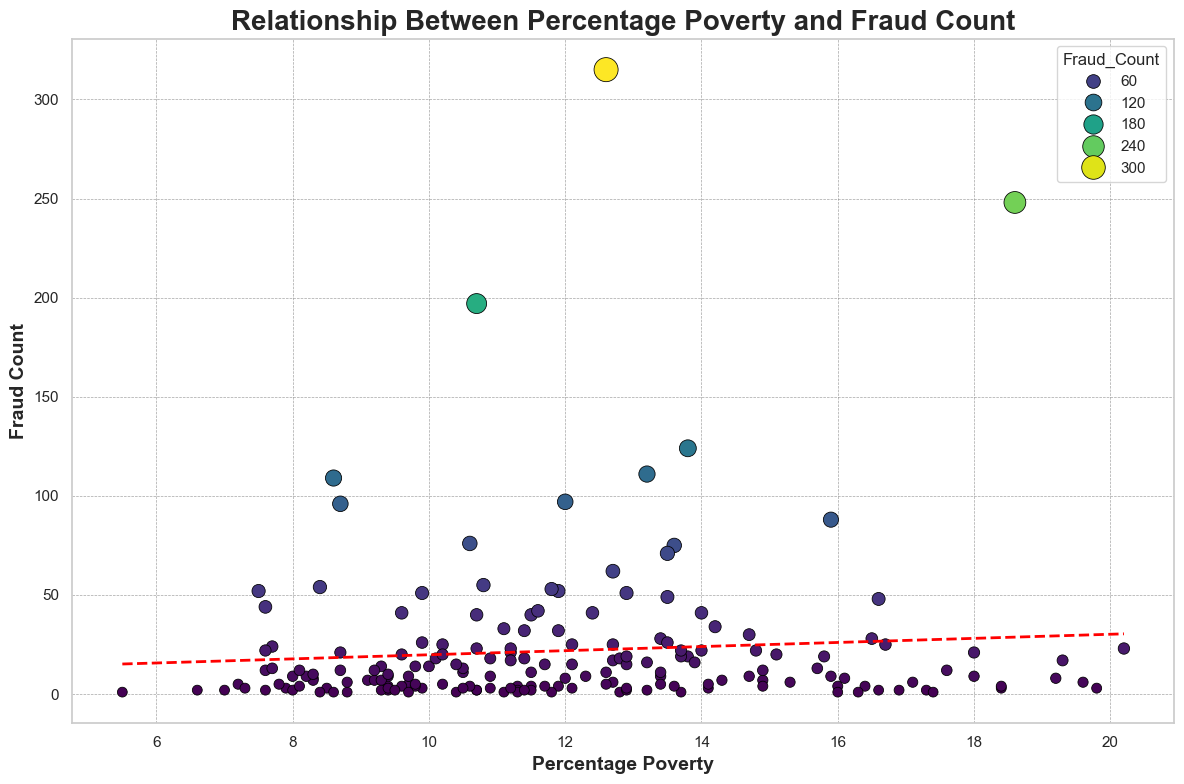

In [86]:
# Aggregate fraudulent transactions by year
poverty_by_year_state = merge_poverty_fraud_df.groupby(['Year', 'State', 'Percentage Poverty']).size().reset_index(name='Fraud_Count')

# Enhanced Scatter Plot for Homeless Rate vs. Fraud Count
plt.figure(figsize=(12, 8))
sns.scatterplot(data=poverty_by_year_state, x='Percentage Poverty', y='Fraud_Count',
                hue='Fraud_Count', size='Fraud_Count', sizes=(50, 300), palette='viridis', edgecolor='black')
plt.title("Relationship Between Percentage Poverty and Fraud Count", fontsize=20, weight="bold")
plt.xlabel("Percentage Poverty", fontsize=14, weight="bold")
plt.ylabel("Fraud Count", fontsize=14, weight="bold")
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)

# Adding regression line
slope, intercept, r_value, p_value, std_err = linregress(poverty_by_year_state['Percentage Poverty'], poverty_by_year_state['Fraud_Count'])
x_vals_sorted = np.sort(poverty_by_year_state['Percentage Poverty'])
y_vals = slope * x_vals_sorted + intercept
plt.plot(x_vals_sorted, y_vals, color='red', linewidth=2, linestyle='--', label="Regression Line")

plt.tight_layout()
plt.show()